## Business Problem

The hotel industry faces the challenge of optimizing customer satisfaction and revenue generation in an increasingly competitive market. This challenge is driven by several key issues:

1. **Delivered Features Improvement:**

    - How can hotels enhance the features they offer to align better with customer preferences and expectations?

2. **Strategic Discount Initiatives:**

    - What data-driven pricing strategies should hotels adopt to offer appealing discounts?

3. **Advisable Suggestions:**

    - What actionable recommendations can hotels receive to enhance various aspects of their operations beyond features and discounts?

4. **Ongoing Exclusive Offers and Deals:**

    - How can hotels consistently create and manage exclusive offers and deals that resonate with guests and set them apart in a competitive market?

5. **Data Quality Compliance:**

    - What can we improve from data quality to actually reflect the problem we encounter through the analysis? 

## Data Understanding and Preparation

### Ignore Future Warnings

In [1]:
import warnings

# ignore future warnings
warnings.simplefilter(
    action='ignore',
    category=FutureWarning
)

### Import Data

In [2]:
import pandas as pd

# loading the data file into a dataframe
data = pd.read_csv(
    filepath_or_buffer='./traveloka_newyearhotels.csv',
    skip_blank_lines=False,
    on_bad_lines='warn',
    delimiter='|'
)

# rename the columns
data.columns = [
    'date','city','checkIn','checkOut','numNights',
    'id','name','displayName','region','star',
    'rating','numReviews','ratingInfo','lat','long',
    'lowRate','highRate','features','seoURL',
    'ceBase','ceFees','ceTaxes','ceTotal',
    'csBase','csFees','csTaxes','csTotal',
    'oeBase','oeFees','oeTaxes','oeTotal',
    'osBase','osFees','osTaxes','osTotal'
]

Each column is a feature or variable which can be described in the following table.

| Column | Description |
| --- | --- |
| `date` | timestamp of an aboservation |
| `city` | city where the hotel is located |
| `checkIn` | available date of the reservation to check-in |
| `checkOut` | check-out date of the reservation |
| `numNights` | period of nights during the reservation |
| `id` | identifier of the hotel building or services |
| `name` | name of the hotel building or services |
| `displayName` | name displayed to users or searchers |
| `region` | district or borough where the hotel is located within the city |
| `star` | level of stars indicating hotel's quality, cleanliness, and standard |
| `rating` | average rating obtained from users' review after using the hotel |
| `numReviews` | number of reviews received by the hotel |
| `ratingInfo` | classification of rating determined by rating |
| `lat` | coordinate that specifies the latitude location of the hotel |
| `long` | coordinate that specifies the longitude location of the hotel |
| `lowRate` | total fare of hotel services in original rate |
| `highRate` | total fare of hotel services during surcharge period |
| `features` | list of facility or acommodations provided by the hotel |
| `seoURL` | URL designed to meet the needs of users and searchers |
| `ceBase` | the cheapest base fare from extended-night services |
| `ceFees` | fees imposed from cheap-extended-night services |
| `ceTaxes` | taxes imposed from cheap-extended-night services |
| `ceTotal` | total fare paid by users that use cheap-extended-night services |
| `csBase` | the cheapest base fare from short-night services |
| `csFees` | fees imposed from cheap-short-night services |
| `csTaxes` | taxes imposed from cheap-short-night services |
| `csTotal` | total fare paid by users that use cheap-short-night services |
| `oeBase` | original base fare from extended-night services |
| `oeFees` | fees imposed from original-extended-night services |
| `oeTaxes` | taxes imposed from original-extended-night services |
| `oeTotal` | total fare paid by users that use original-extended-night services |
| `osBase` | original base fare from short-night services |
| `osFees` | fees imposed from original-short-night services |
| `osTaxes` | taxes imposed from original-short-night services |
| `osTotal` | total fare paid by users that use original-short-night services |

We need inspecting each column in detail.

### Data Attribute Information

In [3]:
# create an attribute information list for each column
items = [[
    column,
    data[column].dtypes,
    len(data[column]),
    data[column].isnull().sum(),
    round(
        number=data[column].isnull().sum()/len(data[column])*100,
        ndigits=2
    ),
    data[column].nunique(),
    list(data[column].unique()[:5]) 
] for column in data.columns]

# create a dataframe to display the attributes
data_info = pd.DataFrame(
    data=items,
    columns=[
        'Column',
        'Data Type',
        'Total Rows',
        'Total Missing',
        '% Missing',
        'Total Unique',
        'Unique Sample',
    ]
).style.background_gradient(
    cmap='viridis'
)

data_info

,Column,Data Type,Total Rows,Total Missing,% Missing,Total Unique,Unique Sample
0,date,object,904,0,0.000000,904,"['2022-12-29 20:41:15.405526', '2022-12-29 20:41:15.405705', '2022-12-29 20:41:15.405741', '2022-12-29 20:41:15.405779', '2022-12-29 20:41:15.405806']"
1,city,object,904,0,0.000000,12,"['Jakarta', 'Bandung', 'Medan', 'Denpasar', 'Banda Aceh']"
2,checkIn,object,904,0,0.000000,2,"['30-12-2022', '31-12-2022']"
3,checkOut,object,904,0,0.000000,1,['02-01-2023']
4,numNights,int64,904,0,0.000000,2,"[3, 2]"
5,id,int64,904,0,0.000000,471,"[62303, 2000000141144, 9000000952972, 9000000971405, 4755]"
6,name,object,904,0,0.000000,471,"['The Sultan Hotel & Residence Jakarta', 'Aryaduta Suite Semanggi', 'Aloft South Jakarta', 'The Langham, Jakarta', 'Hotel Mulia Senayan, Jakarta']"
7,displayName,object,904,0,0.000000,471,"['The Sultan Hotel Jakarta', 'Aryaduta Suite Semanggi', 'Aloft South Jakarta', 'The Langham, Jakarta', 'Hotel Mulia Senayan, Jakarta']"
8,region,object,904,0,0.000000,173,"['Senayan, Jakarta', 'Karet Semanggi, Jakarta', 'Cilandak Timur, Jakarta', 'Kebagusan, Jakarta', 'Petojo Utara, Jakarta']"
9,star,float64,904,0,0.000000,9,"[5.0, 4.0, 3.0, 0.0, 2.0]"


### Convert Inappropriate Column and Data Type

#### Inspecting `date` column

In [4]:
# check the information of "date" column
data['date'].info(
    verbose=False
)

<class 'pandas.core.series.Series'>
RangeIndex: 904 entries, 0 to 903
dtypes: object(1)
memory usage: 7.2+ KB


The current data type of the `date` column is classified as an object; however, it is advisable and appropriate for it to be designated as a datetime data type.

In [5]:
# convert "date" column into datetime format
data['date'] = pd.to_datetime(
    arg=data['date']
)

# check the range of its values
start_date = data['date'].min()
data['date'].apply(
    func=lambda x: x-start_date
).max()

Timedelta('0 days 00:03:29.868555')

In the dataset, there appears to be a column containing date information. However, it seems that this data isn't directly tied to user booking times, but rather indicates when the data itself was collected. This observation is supported by the fact that the minimum and maximum values in this column are only 3 and a half minutes apart. Given this narrow timeframe, it's worth considering if it could be deemed unnecessary for our purposes.

In [6]:
# drop the "date" column
data.drop(
    labels='date',
    axis=1,
    inplace=True
)

#### Inspecting `checkOut` column

In [7]:
# check the value counts on "checkOut" column
data['checkOut'].value_counts()

checkOut
02-01-2023    904
Name: count, dtype: int64

The `checkOut` column seems to contain only a single unique value, indicating the date when users are expected to check out. However, this information appears redundant, as the same information can be derived from the `numNights` column. Considering this, it might be more suitable to eliminate the `checkOut` column from the dataset.

In [8]:
# drop the "checkOut" column
data.drop(
    labels='checkOut',
    axis=1,
    inplace=True
)

#### Inspecting `city`, `checkIn`, and `ratingInfo` columns

In [9]:
# check the unique values from "city", "checkIn", and "ratingInfo" columns
for column in ['city','checkIn','ratingInfo']:
    print(f'"{column}" column')
    display(data[column].unique())

"city" column


array(['Jakarta', 'Bandung', 'Medan', 'Denpasar', 'Banda Aceh', 'Padang',
       'Palembang', 'Bogor', 'Semarang', 'Yogyakarta', 'Solo', 'Surabaya'],
      dtype=object)

"checkIn" column


array(['30-12-2022', '31-12-2022'], dtype=object)

"ratingInfo" column


array(['Mengesankan', 'Nyaman', 'Baik', nan, 'Luar Biasa'], dtype=object)

Optimizing these columns by converting them into categorical data types is a prudent move, given that this transformation can have a significant impact on memory usage when the dataset is stored as a `DataFrame`. The use of categorical data types is especially advantageous for columns with a limited number of unique values, as it can substantially reduce memory consumption.

In [10]:
for column in ['city','checkIn','ratingInfo']:
    data[column] = data[column].astype(
        dtype='category'
    )

#### Inspecting `id` column

In [11]:
# check the top 5 of value counts on "id" column
display(data['id'].value_counts().head())

data['id'].info(
    verbose=False
)

id
3000010000522    4
9000000889400    4
9000000475431    4
486909           4
1000000529269    4
Name: count, dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 904 entries, 0 to 903
dtypes: int64(1)
memory usage: 7.2 KB


Information on `id` column is telling the identifier of the hotel and stored in numerical type. Even though, it's appropriate to have it at first, yet the data type should be considered as object type since it's not a function as mathematical property.

In [12]:
# convert "id" column into object data type
data['id'] = data['id'].astype(
    dtype=str
)

#### Inspecting `checkIn` column

In [13]:
# check the value counts on "checkIn" column
data['checkIn'].value_counts()

checkIn
31-12-2022    474
30-12-2022    430
Name: count, dtype: int64

Convert the date-alike-values in `checkIn` column into categorical in order to make it more representative. Check in date with value `30-12-2022` is considered `early`, otherwise it is considered `late`.

In [14]:
# change the value in "chechIn" column
data['checkIn'] = data['checkIn'].apply(
    func=lambda x: 'early' if x == '30-12-2022' else 'late'
)

data['checkIn'].value_counts()

checkIn
late     474
early    430
Name: count, dtype: int64

#### Inspecting `name` and `displayName` columns

In [15]:
# check the head of "name" and "displayName" columns
data[['name','displayName']].head()

,name,displayName
0,The Sultan Hotel & Residence Jakarta,The Sultan Hotel Jakarta
1,Aryaduta Suite Semanggi,Aryaduta Suite Semanggi
2,Aloft South Jakarta,Aloft South Jakarta
3,"The Langham, Jakarta","The Langham, Jakarta"
4,"Hotel Mulia Senayan, Jakarta","Hotel Mulia Senayan, Jakarta"


Information on `name` and `displayName` columns are sharing the respective name of the hotel and presumably kind of redundant. It's recommended to drop one of them if the assumption is valid.

In [16]:
# check to see how many count there are different value between "name" and "displayName" columns
data[['name','displayName']].apply(
    func=lambda x: x['name']!=x['displayName'],
    axis=1
).sum()

17

Since there's only 17 counts, it's better to drop `displayName` column.

In [17]:
# drop displayName column
data.drop(
    labels='displayName',
    axis=1,
    inplace=True
)

Make each hotel's name in title format.

In [18]:
# format hotel name using title method
data['name'] = data['name'].apply(
    func=lambda x: x.title()
)

#### Inspecting `region` column

In [19]:
# check the value counts of "region" column
data['region'].value_counts().head()

region
Ilir Timur II, Palembang    40
Padang Barat, Padang        36
Depok, Yogyakarta           33
Pusat Kota Medan, Medan     26
Genteng, Surabaya           24
Name: count, dtype: int64

Information on `region` is telling the borough where the hotels are actually located. But, it shouldn't include the name of the city after the very borough. So we decide to chop off the rest after it.

In [20]:
# filter the information only for the borough's name
data['region'] = data['region'].apply(
    func=lambda x: x.split(
        sep=','
    )[0]
)

data['region'].value_counts().head()

region
Ilir Timur II       40
Padang Barat        36
Depok               33
Pusat Kota Medan    26
Genteng             24
Name: count, dtype: int64

#### Inspecting `star` column

In [21]:
# check unique data in "star" column
data['star'].unique()

array([5. , 4. , 3. , 0. , 2. , 1. , 1.5, 3.5, 2.5])

Evidently, discrepancies have emerged within the `star` column, where values such as `1.5`, `2.5`, and `3,5` appear to have been misclassified. To address this, a rigorous statistical examination will be undertaken. This investigation aims to establish a rigorous basis for reclassifying these values into their respective closest classes.

In [22]:
from scipy.stats import kruskal

# specify the group of "csTotal" column based-on "star" column of "1.0" and "1.5" classes
group = [data[(data['star']==i)]['csTotal'] for i in [1,1.5]]

# calculate the statistical test among classes
result = kruskal(*group)
clause = [
    ['below','above'],
    ['significant','insignificant'],
    ['between at least two different year ','']
]

# print the result of statistical test
k = 0 if result.pvalue < 0.05 else 1
print(
    f'The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
    f'difference {clause[2][k]}' + 'for lowest rate measurement.'
)

The p-value is above 0.05, indicating insignificant difference for lowest rate measurement.


Based-on lowest rate measurement, there is no significant difference between `1.0` and `1.5` star-service hotel. Thus, we will change the value of `1.5` star-service into `1.0` star-service.

In [23]:
# change value in "star" column whose star is 1.5 into 1.0
data.loc[data['star']==1.5,'star'] = 1.0

In [24]:
# specify the group of "csTotal" column based-on "star" column of "2.0" and "2.5" classes
group = [data[(data['star']==i)]['csTotal'] for i in [2,2.5]]

# calculate the statistical test among classes
result = kruskal(*group)
clause = [
    ['below','above'],
    ['significant','insignificant'],
    ['between at least two different year ','']
]

# print the result of statistical test
k = 0 if result.pvalue < 0.05 else 1
print(
    f'The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
    f'difference {clause[2][k]}' + 'for lowest rate measurement.'
)

The p-value is above 0.05, indicating insignificant difference for lowest rate measurement.


Based-on lowest rate measurement, there is no significant difference between `2.0` and `2.5` star-service hotel. Thus, we will change the value of `2.5` star-service into `2.0` star-service.

In [25]:
# change value in "star" column whose star is 2.5 into 2.0
data.loc[data['star']==2.5,'star'] = 2.0

In [26]:
# specify the group of "csTotal" column based-on "star" column of "2.0" and "2.5" classes
group = [data[(data['star']==i)]['csTotal'] for i in [3,3.5]]

# calculate the statistical test among classes
result = kruskal(*group)
clause = [
    ['below','above'],
    ['significant','insignificant'],
    ['between at least two different year ','']
]

# print the result of statistical test
k = 0 if result.pvalue < 0.05 else 1
print(
    f'The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
    f'difference {clause[2][k]}' + 'for lowest rate measurement.'
)

The p-value is above 0.05, indicating insignificant difference for lowest rate measurement.


Based-on lowest rate measurement, there is no significant difference between `3.0` and `3.5` star-service hotel. Thus, we will change the value of `3.5` star-service into `3.0` star-service.

In [27]:
# change value in "star" column whose star is 3.5 into 3.0
data.loc[data['star']==3.5,'star'] = 3.0

Then, we convert `star` column as integer format data type.

In [28]:
# convert data type in "star" column into integer
data['star'] = data['star'].astype(
    dtype=int
)

#### Inspecting fare-related columns

In [29]:
# check the data type of all fare-related columns
data[data.columns[16:]].dtypes

ceBase       int64
ceFees       int64
ceTaxes      int64
ceTotal      int64
csBase       int64
csFees     float64
csTaxes    float64
csTotal      int64
oeBase       int64
oeFees       int64
oeTaxes      int64
oeTotal      int64
osBase       int64
osFees     float64
osTaxes    float64
osTotal      int64
dtype: object

The fare-related details have been provided comprehensively; however, there appears to be a certain inconsistency in the data types used. Specifically, in columns such as `csFees`, `csTaxes`, `osFees`, and `osTaxes`, the data type differs from the rest, which are predominantly of float type. To ensure uniformity, it is suggested to perform data type conversion for these columns. Any potential consequences of this action can be managed during the subsequent stages of data preparation.

In [30]:
# convert "csFees", "csTaxes", "osFees", and "osTaxes" columns into integer data type
col_to_convert = ['csFees','csTaxes','osFees','osTaxes']

for column in col_to_convert:
    data[column] = data[column].astype(
        dtype='int64'
    )

### Numerical Columns Distribution

#### Normality Test

In [31]:
import scipy.stats as stats
import numpy as np

# create descriptive statistics on all numerical columns
desc_stats = data.drop(
    labels=['numNights','highRate'],
    axis=1
).describe().transpose()

# create a normality test to assess each column distribution
np.random.seed(
    seed=1995
)

columns, statistics, p_val, result = [], [], [], []

for column in desc_stats.index:
    stat, pvalue = stats.kstest(
        rvs=data[column],
        cdf=np.random.normal(
            loc=data[column].mean(),
            scale=data[column].std(),
            size=len(data[column])
        )
    )

    # append the result to lists for each iteration
    columns.append(column)
    statistics.append(stat)
    p_val.append(pvalue)
    result.append(True if pvalue > 0.05 else False)

# create a dataframe of normality test result
normal_test_df = pd.DataFrame(
    data={
        'statistics':statistics,
        'p-value':p_val,
        'normally distributed':result
    },
    index=columns
)

# merge dataframes from descriptive statistics and normality test result
desc_stats.merge(
    right=normal_test_df,
    left_index=True,
    right_index=True
)

,count,mean,std,min,25%,50%,75%,max,statistics,p-value,normally distributed
star,904.0,2.961283e+00,1.471638e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,0.206858,2.449107e-17,False
rating,891.0,8.361279e+00,3.928492e-01,6.600000,8.200000e+00,8.400000e+00,8.600000e+00,9.200000e+00,0.146018,8.034669e-09,False
numReviews,902.0,3.526163e+03,3.583148e+03,1.000000,4.200000e+02,2.426500e+03,5.596750e+03,1.924900e+04,0.188053,2.197159e-14,False
lat,904.0,-4.343883e+00,4.201038e+00,-8.666268,-7.267114e+00,-6.588687e+00,-2.949854e+00,5.576094e+00,0.318584,5.939749e-41,False
long,904.0,1.062606e+02,4.986916e+00,95.302303,1.047329e+02,1.068358e+02,1.104079e+02,1.152136e+02,0.173673,2.545003e-12,False
lowRate,904.0,3.364736e+06,4.412865e+06,117340.000000,1.128750e+06,2.239338e+06,4.029255e+06,7.588800e+07,0.228982,3.496850e-21,False
ceBase,904.0,2.784314e+06,3.652068e+06,96975.000000,9.369840e+05,1.852892e+06,3.329963e+06,6.271736e+07,0.267699,6.856973e-29,False
ceFees,904.0,9.823314e+04,3.688943e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.252500e+06,0.471239,4.157584e-91,False
ceTaxes,904.0,4.821897e+05,7.270793e+05,0.000000,1.402645e+05,3.222025e+05,5.843498e+05,1.317064e+07,0.259956,3.007084e-27,False
ceTotal,904.0,3.364736e+06,4.412865e+06,117340.000000,1.128750e+06,2.239338e+06,4.029255e+06,7.588800e+07,0.234513,3.305007e-22,False


All columns don't follow normal distribution indicated with `p-value` less than 0.05 or rejecting null hypothesys.

#### Outliers Detection

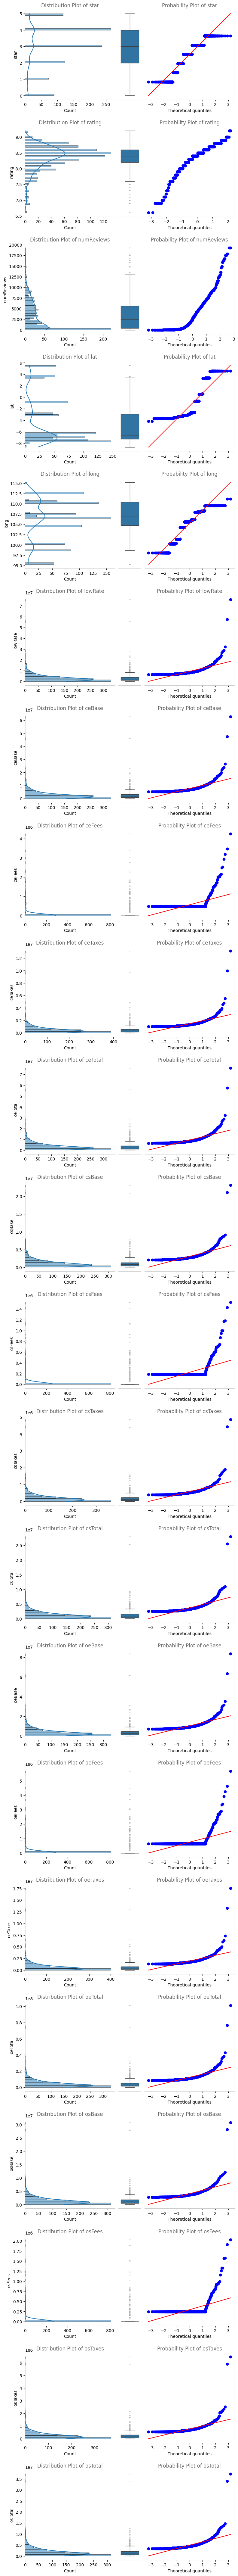

In [32]:
from scipy.stats import probplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# create a 3-column axis for each column with rows appropriate with the number of columns 
fig, axes = plt.subplots(
    nrows=len(desc_stats.index),
    ncols=3,
    figsize=(9, 5*len(desc_stats.index)),
    gridspec_kw={
        'width_ratios':[4,1,4],
        'wspace':.05,
        'hspace':.3
    }
)

# iterate through each column
for i, col in enumerate(
    iterable=desc_stats.index
):
    # create a histplot on the first axis on left
    sns.histplot(
        data=data,
        y=col,
        bins=50,
        kde=True,
        ax=axes[i,0]
    )

    # configure certain hisplot properties for visualization purposes
    axes[i,0].set_xlabel(
        xlabel='Count'
    )

    axes[i,0].set_ylabel(
        ylabel=col
    )

    axes[i,0].set_title(
        label='Distribution Plot of {}'.format(col),
        color='dimgrey'
    )

    # configure certain spines of the histplot for visualization purposes
    for n, loc in enumerate(
        iterable=['top','right','left','bottom']
    ):
        axes[i,0].spines[loc].set_visible(
            b=False if n < 2 else True
        )

        axes[i,0].spines[loc].set_color(
            c='#CCCCCC'
        )

    # create additional boxplot on the second axis in the middle
    sns.boxplot(
        data[col],
        fliersize=1,
        linewidth=1,
        ax=axes[i,1]
    )
    
    # configure certain boxplot properties for visualization purposes
    axes[i,1].set_xlabel(
        xlabel='Boxplot'
    )

    axes[i,1].set_ylabel(
        ylabel=''
    )

    axes[i,1].xaxis.set_visible(
        b=False
    )

    axes[i,1].yaxis.set_visible(
        b=False
    )

    # configure certain spines of the boxplot for visualization purposes
    for n, loc in enumerate(
        iterable=['top','left','right','bottom']
    ):
        axes[i,1].spines[loc].set_visible(
            b=False if n < 3 else True
        )

        axes[i,1].spines[loc].set_color(
            c='#CCCCCC'
        )

    # create a chi-square plot to see its distribution characteristics
    probplot(
        x=data[col],
        plot=axes[i,2]
    )

    # configure certain chi-square plot properties for visualization purposes
    axes[i,2].yaxis.set_visible(
        b=False
    )

    axes[i,2].set_title(
        label='Probability Plot of {}'.format(col),
        color='dimgrey'
    )

    # configure certain spines of the chi-square plot for visualization purposes
    for n, loc in enumerate(
        iterable=['top','left','bottom','right']
    ):
        axes[i,2].spines[loc].set_visible(
            b=False if n < 2 else True
        )

        axes[i,2].spines[loc].set_color(
            c='#CCCCCC'
        )

### Missing Values

#### Missing Values Proportion

Text(0.5, 1.0, 'Total Missing Value')

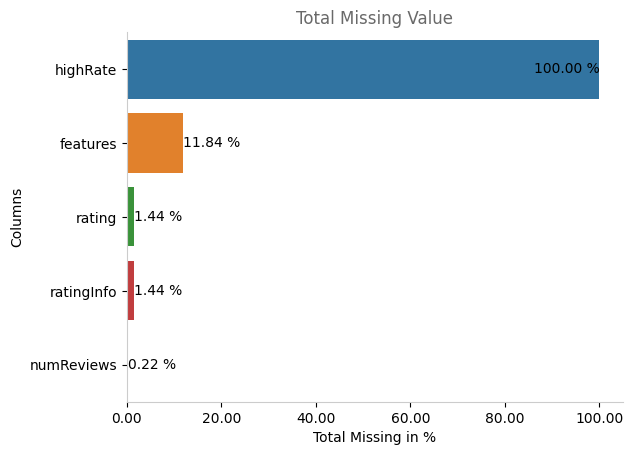

In [33]:
from matplotlib import ticker

# create a dataframe on missing information on each column
missing_info = pd.DataFrame(
    data=round(
        number=data.isnull().sum()/data.shape[0]*100,
        ndigits=2
    )
)

missing_info = missing_info[missing_info[0] != 0].sort_values(
    by=0,
    ascending=False
)

# create a barplot to visualize the "missing_info" dataframe
barplot = sns.barplot(
    missing_info,
    x=0,
    y=missing_info.index
)

# apply annotation to each bar on barplot
for i, val in enumerate(
    iterable=missing_info[0]
):
    plt.annotate(
        text=f'{val:,.2f} %',
        xy=(val,i),
        ha='right' if i < 1 else 'left',
        va='center'
    )

# configure certain barplot properties for visualization purposes
sns.despine()
barplot.spines['left'].set_color(
    c='#CCCCCC'
)

barplot.spines['bottom'].set_color(
    c='#CCCCCC'
)

barplot.xaxis.set_major_formatter(
    formatter=ticker.FuncFormatter(
        func=lambda x,y: f'{x:.2f}'
    )
)

plt.xlabel(
    xlabel='Total Missing in %'
)

plt.ylabel(
    ylabel='Columns'
)

plt.title(
    label='Total Missing Value',
    size=12,
    color='dimgrey'
)

Some information are just missing shown on the visualization above in `highRate`, `features`, `rating`, `ratingInfo`, and `numReviews` columns.

#### Missing Values Correlation

<Axes: >

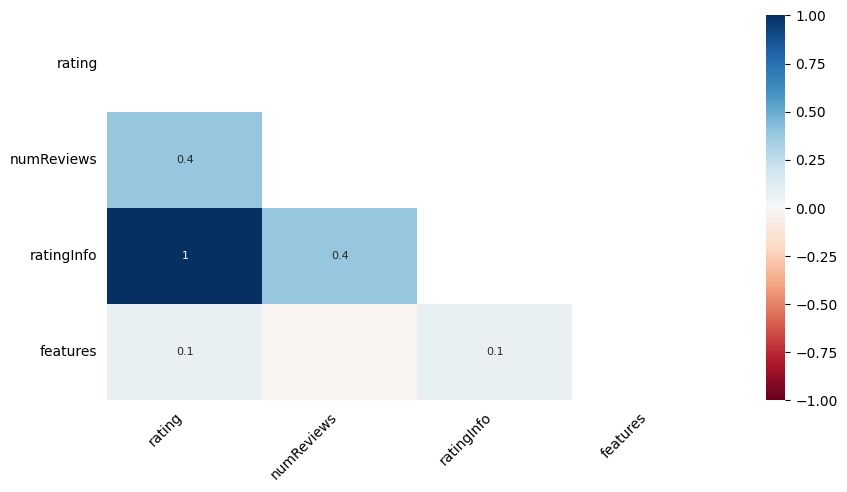

In [34]:
import missingno as msno

# create a visualization of correlation among columns whose missing values are existing
msno.heatmap(
    df=data,
    figsize=(10,5),
    fontsize=10
)

The correlation among columns whose missing values are existing shown on visualization above with the highest correlation occurs in `rating` and `ratingInfo` columns which means the missing location are exactly the same in all missing observations.

#### Missing-Values Handling on `rating` and `ratingInfo` columns

,ratingInfo,count,mean,std,min,25%,50%,75%,max
0,Baik,13.0,6.884615,0.134450,6.6,6.9,6.9,7.0,7.0
1,Luar Biasa,4.0,9.200000,0.000000,9.2,9.2,9.2,9.2,9.2
2,Mengesankan,628.0,8.554459,0.177783,8.3,8.4,8.5,8.7,9.0
3,Nyaman,246.0,7.932520,0.267260,7.1,7.8,8.0,8.1,8.2


Text(0.5, 1.0, 'Distribution of Rating Info by Rating')

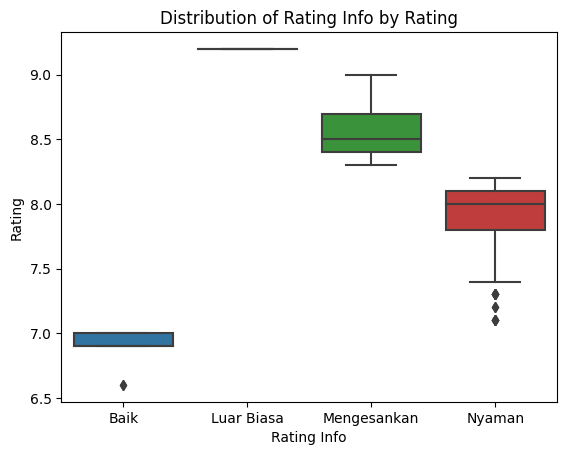

In [35]:
# check descriptive statistics on "rating" column based-on "ratingInfo" column classes
rating_stats = data.groupby(
    by='ratingInfo',
    observed=True
)['rating'].describe().reset_index()

display(rating_stats)

# visualize its distribution against "ratingInfo" column
sns.boxplot(
    data=data,
    x='ratingInfo',
    y='rating'
)

plt.xlabel(
    xlabel='Rating Info'
)

plt.ylabel(
    ylabel='Rating'
)

plt.title(
    label='Distribution of Rating Info by Rating'
)

In [36]:
# find the most correlated column to "rating" column
data.drop(
    labels='rating',
    axis=1
).corrwith(
    other=data['rating'],
    numeric_only=True,
    method='spearman'
).sort_values(
    ascending=False
).head(
    n=1
)

csBase    0.572506
dtype: float64

The most correlated column with `rating` column is `csBase` column. Before we inspect the significance difference, we should create another column that represents interval values in `csBase` column since its values are numerically continuous.

In [37]:
# create a new column that represents "csBase" column
data['csBase_interval'] = pd.cut(
    x=data['csBase'],
    bins=20
)

In [38]:
# specify the group of "rating" column based-on "star" column classes
group = [data[(data['csBase_interval']==i)]['rating'] for i in data['csBase_interval'].unique()]

# calculate the statistical test among classes
result = kruskal(*group)
clause = [
    ['below','above'],
    ['significant','insignificant'],
    ['between at least two different year ','']
]

# print the result of statistical test
k = 0 if result.pvalue < 0.05 else 1
print(
    f'The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
    f'difference {clause[2][k]}' + 'for rating measurement.'
)

The p-value is above 0.05, indicating insignificant difference for rating measurement.


As we knew from the result above, we can try to impute the missing value in `rating` column using median of `rating` column for each class interval of `csBase_interval` column.

In [39]:
# create a base fare-rating dictionary
csBase_rating_dictionary = data.groupby(
    by='csBase_interval',
    observed=True
)['rating'].median().to_dict()

# impute the missing values on "rating" column
data.loc[data['rating'].isnull(),'rating'] = data[data['rating'].isnull()]['csBase_interval'].apply(
    func=lambda x: csBase_rating_dictionary.setdefault(x)
)

# drop "csBase_interval" column
data.drop(
    labels='csBase_interval',
    axis=1,
    inplace=True
)

We can impute the missing values existed on `ratingInfo` column by using values on `rating` column.

In [40]:
# create a custome function to impute missing value on "ratingInfo" column
def rating_info_impute(value):
    rating_info = None
    
    for i in range(len(rating_stats)):
        min_limit = rating_stats.iloc[i]['min']
        max_limit = rating_stats.iloc[i]['max']

        if value >= min_limit and value <= max_limit:
            rating_info = rating_stats.iloc[i]['ratingInfo']

    return rating_info

# impute the missing value on "ratingInfo" column
data.loc[data['ratingInfo'].isnull(),'ratingInfo'] = data[data['ratingInfo'].isnull()]['rating'].apply(
    func=rating_info_impute
)

#### Missing-Values Handling on `numReviews` columns

<Axes: xlabel='rating', ylabel='numReviews'>

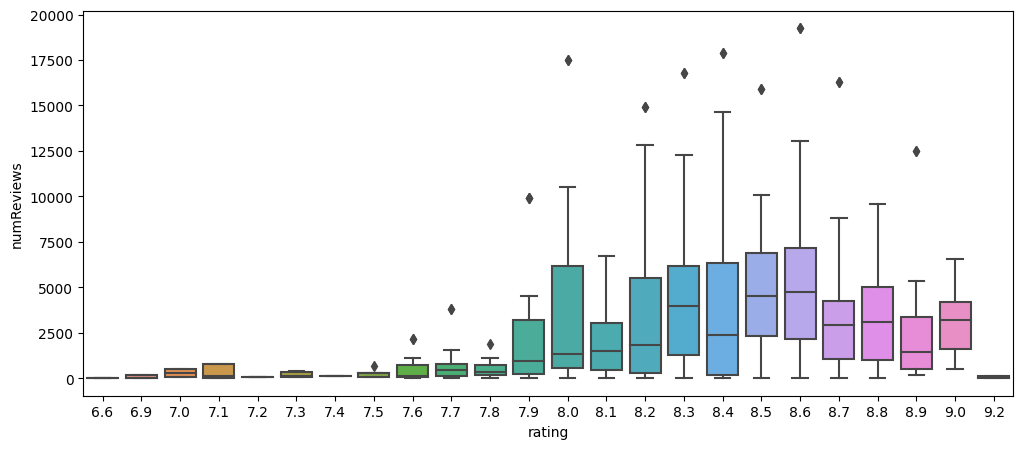

In [41]:
# visualize its distribution against "rating" column
plt.figure(
    figsize=(12,5)
)

sns.boxplot(
    data=data,
    x='rating',
    y='numReviews'
)

In [42]:
# find the most correlated column to "numReviews" column
data.drop(
    labels='numReviews',
    axis=1
).corrwith(
    other=data['numReviews'],
    numeric_only=True,
    method='spearman'
).sort_values(
    ascending=False
).head(
    n=1
)

star    0.489682
dtype: float64

The most correlated column with `numReviews` column is `star` column. Then, we inspect the significance difference among classes in `star` column.

In [43]:
# specify the group of "numReviews" column based-on "star" column classes
group = [data[(data['star']==i)]['rating'] for i in data['star'].unique()]

# calculate the statistical test among classes
result = kruskal(*group)
clause = [
    ['below','above'],
    ['significant','insignificant'],
    ['between at least two different star ','']
]

# print the result of statistical test
k = 0 if result.pvalue < 0.05 else 1
print(
    f'The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
    f'difference {clause[2][k]}' + 'for numReviews measurement.'
)

The p-value is below 0.05, indicating significant difference between at least two different star for numReviews measurement.


As the result of Kruskal-Wallis test is above 0.05, we can't impute the missing values on `numReviews` column using the values from `star` column. As the impact, we decide to drop observations whose missing values are existing on `numReviews` column.

In [44]:
# drop the observation whose missing values are existing on "numReviews" column
data.drop(
    index=data[data['numReviews'].isnull()].index,
    inplace=True
)

#### Missing-Values Handling on `features` columns

In [45]:
# check value counts on "features" column
data['features'].value_counts().head()

features
Bayar saat Check-in                        47
Bayar saat Check-in, Check-out ekspress    45
Check-out ekspress                         34
Aksesibel bagi penyandang disabilitas      20
Sewa mobil                                 14
Name: count, dtype: int64

Each information on `features` column is actually a list of features provided by the hotel. We can try to create a new column by calculating the number of features provided by each hotel.

In [46]:
# create a custom function to impute values on "numFeatures" column
def numFeatures_impute(value):
    try:
        numFeatures = value.split(
            sep=', '
        )

    except:
        numFeatures = []
    
    return len(numFeatures)

# create a new column called "numFeatures"
data['numFeatures'] = data['features'].apply(
    func=numFeatures_impute
)

<Axes: xlabel='rating', ylabel='numFeatures'>

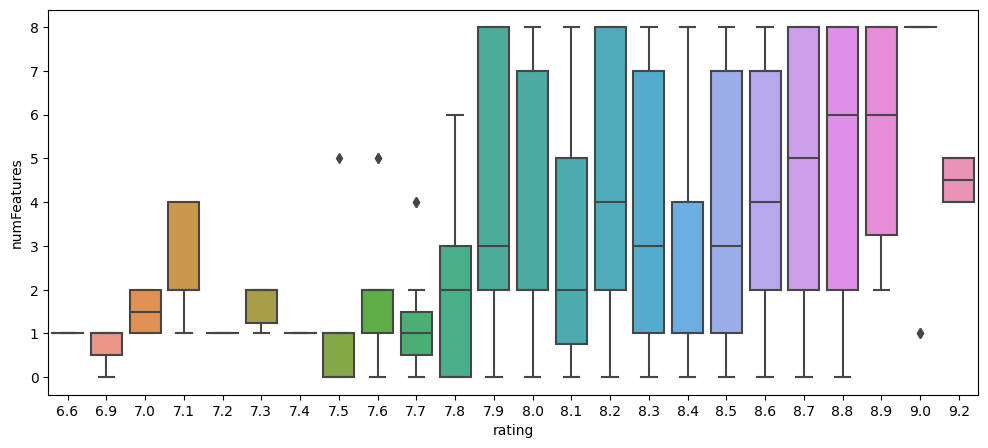

In [47]:
# visualize its distribution against "rating" column
plt.figure(
    figsize=(12,5)
)

sns.boxplot(
    data=data,
    x='rating',
    y='numFeatures'
)

In [48]:
# find the most correlated column to "numFeatures" column
data.drop(
    labels='numFeatures',
    axis=1
).corrwith(
    other=data['numFeatures'],
    numeric_only=True,
    method='spearman'
).sort_values(
    ascending=False
).head(
    n=1
)

star    0.577078
dtype: float64

The most correlated column with `numFeatures` column is `star` column. Then, we inspect the significance difference among classes in `star` column.

In [49]:
# specify the group of "numFeatures" column based-on "star" column classes
filter_conditions = lambda *x: (data['star']==x) & (data['features'].notnull()) 
group = [data[filter_conditions(i)]['numFeatures'] for i in data['star'].unique()]

# calculate the statistical test among classes
result = kruskal(*group)
clause = [
    ['below','above'],
    ['significant','insignificant'],
    ['between at least two different star ','']
]

# print the result of statistical test
k = 0 if result.pvalue < 0.05 else 1
print(
    f'The p-value is {clause[0][k]} 0.05, indicating {clause[1][k]}',
    f'difference {clause[2][k]}' + 'for numFeatures measurement.'
)

The p-value is below 0.05, indicating significant difference between at least two different star for numFeatures measurement.


As there's none correlation between `star` and `numFeatures` columns, we are finally unable to impute the missing values in `features` column. Alternatively, we can impute the missing values with another values since it's more appropriate not to leave it blank.

In [50]:
# impute missing values on "features" column with another value
data.loc[data['features'].isnull(),'features'] = 'Tidak ada'

#### Missing-Values Handling on fare-related columns

In [51]:
# check the values between "checkIn" and "numNights" columns
data.groupby(
    by='checkIn',
    observed=True
)['numNights'].value_counts()

checkIn  numNights
early    3            429
late     2            473
Name: count, dtype: int64

In [52]:
# check the most correlated column with "lowRate" column
data.drop(
    labels='lowRate',
    axis=1
).corrwith(
    other=data['lowRate'],
    method='spearman',
    numeric_only=True
).sort_values(
    ascending=False
).head(
    n=1
)

ceTotal    1.0
dtype: float64

This analysis offers a valuable insight into the nature of the `lowRate` column, revealing its direct correlation with the `ceTotal` column, which essentially signifies the most economical rate for extended-night services. With this understanding, a logical step emerges: the potential removal of the `lowRate` and `highRate` columns from the dataset. Notably, these columns find their counterparts in the form of the `ceTotal` and `oeTotal` columns. By streamlining the dataset in this manner, redundancy is minimized while the core information is retained, fostering a more efficient and effective analytical process.

In [53]:
# drop "lowRate" and "highRate" columns
data.drop(
    labels=['lowRate','highRate'],
    axis=1,
    inplace=True
)

### Duplicated Values

In [54]:
# check total count of duplicated observations
data.duplicated().sum()

37

A critical observation reveals the presence of 37 instances that exhibit duplicative characteristics within the dataset. A strategic decision has been made to systematically remove these redundant entries.

In [55]:
# drop the observations that are indicated as duplicated
data.drop_duplicates(
    inplace=True
)

### Attribute Information Summary

Upon completing a thorough array of data understanding and preparation procedures, it becomes imperative to circle back and reevaluate the updated attribute information encapsulated within the dataframe.

In [56]:
# create an attribute information list for each column
items = [[
    column,
    data[column].dtypes,
    len(data[column]),
    data[column].isnull().sum(),
    round(
        number=data[column].isnull().sum()/len(data[column])*100,
        ndigits=2
    ),
    data[column].nunique(),
    list(data[column].unique()[:5]) 
] for column in data.columns]

# create a dataframe to display the attributes
data_info = pd.DataFrame(
    data=items,
    columns=[
        'Column',
        'Data Type',
        'Total Rows',
        'Total Missing',
        '% Missing',
        'Total Unique',
        'Unique Sample',
    ]
).style.background_gradient(
    cmap='viridis'
)

data_info

,Column,Data Type,Total Rows,Total Missing,% Missing,Total Unique,Unique Sample
0,city,category,865,0,0.000000,12,"['Jakarta', 'Bandung', 'Medan', 'Denpasar', 'Banda Aceh']"
1,checkIn,category,865,0,0.000000,2,"['early', 'late']"
2,numNights,int64,865,0,0.000000,2,"[3, 2]"
3,id,object,865,0,0.000000,470,"['62303', '2000000141144', '9000000952972', '9000000971405', '4755']"
4,name,object,865,0,0.000000,470,"['The Sultan Hotel & Residence Jakarta', 'Aryaduta Suite Semanggi', 'Aloft South Jakarta', 'The Langham, Jakarta', 'Hotel Mulia Senayan, Jakarta']"
5,region,object,865,0,0.000000,173,"['Senayan', 'Karet Semanggi', 'Cilandak Timur', 'Kebagusan', 'Petojo Utara']"
6,star,int32,865,0,0.000000,6,"[5, 4, 3, 0, 2]"
7,rating,float64,865,0,0.000000,24,"[8.6, 8.5, 8.9, 8.8, 8.7]"
8,numReviews,float64,865,0,0.000000,448,"[7247.0, 4882.0, 467.0, 340.0, 1540.0]"
9,ratingInfo,category,865,0,0.000000,4,"['Mengesankan', 'Nyaman', 'Baik', 'Luar Biasa']"
